# OESON PROJECT 3&4  Graduation Prediction


## Project Description

This project involves the exploration and analysis and prediction of student data obtained from a reputed university that include relevant information of the students currently enrolled in  the university for a specific program like personal information and curriculum data.

As a Data Scientist I performed EDA on the data and suggested a prediction model which predicts whether a college student will graduate or not using at least six machine learning algorithms.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

We need to dowload all necesary libraries for analysis and modeling of the data.

For reading our data set as csv file we used pandas library.

In [8]:
df = pd.read_csv("Student_academic.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


We can see the whole dataset with all details of the students the data file has 4424 rows and 35 columns .
With the help of head and tail commends we can have an idea about the data which we are concentrating on "Target".

In [10]:
df = pd.read_csv("Student_academic.csv")
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
df.tail(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


Okay, now we want to learn more about our data types are there any objects or all of them are numerical values?

Exploratory Data Analysis (EDA) it is crutial to have the idea what kind of data we are working for, then we are able to do feature engineering accordinly, after all we can then go to the modelling part.

## Exploratory Data Analysis (EDA) 

In [14]:
#Checking the column information of the data frame

df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [326]:
#Checking the null count of the data an the number of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

We have most of our data in numbers as intergers and floats however we object data as Target.We must consider this in following steps as pre-processing step.

In [16]:
df.isna().sum()
### sanity check to make sure there's no null value in the columns 

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

We should also check are there any null values! All the values are filled with data.

In [18]:
#Checking the shape of the data
df.shape

(4424, 35)

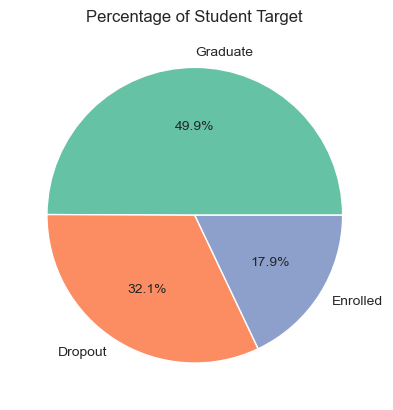

In [329]:
#Have an overview idea with a quick visualzation as pie chart
student_target = df['Target'].value_counts()
colors=sns.color_palette('Set2')
plt.pie(student_target, labels=student_target.index, autopct= '%1.1f%%',colors=colors)

plt.title('Percentage of Student Target')
plt.show()

<Axes: >

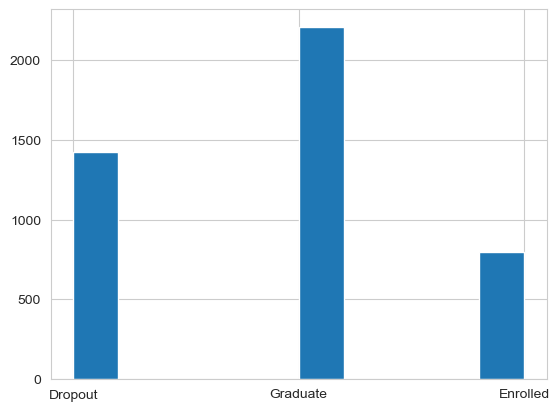

In [330]:
df['Target'].hist()

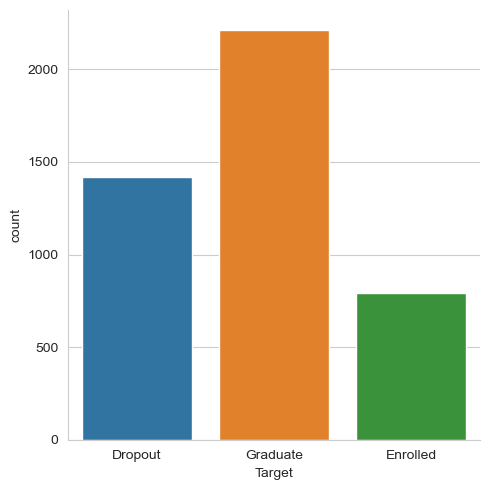

In [331]:
sns.catplot(data=df, x='Target', kind='count')


Regarding the target variable, almost half of the data falls within the Graduate category.



In [20]:
#Alos checking the statistical data
df.describe()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [22]:
#  The data have object which means it is categorical data, now converting categorical data to numeric data.
dummies_df = pd.get_dummies(df)
display(df.head())
display(df.tail())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


Now they are still strings (Target values) not numbers 

In [24]:
# Convert Yes to 1 and No to 0 for the Target:

df['Target'] = df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2 })
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


Now the Target got numerical valeus as 0,1,2.

In [26]:
# Before the EDA, dropping the values would be benefical, those are the ones are not  affecting the  course and it's factors to determine a pass or not
#as folllows: Marital status, attendance, self/parent qualifications and occupations, special needs,gender, age, international, do not have an affect on Target

df = df.drop(["Application mode","Marital status", "Application order", "Daytime/evening attendance",
              "International","Nacionality", "Mother's qualification", "Father's qualification","Debtor","Mother's occupation",
              "Father's qualification","Displaced", "Educational special needs", "Gender",
              "Age at enrollment", ], axis=1)
df.head(5)

,Course,Previous qualification,Father's occupation,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,2,1,10,1,0,0,0,0,0,0.000000,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,11,1,4,0,0,0,6,6,6,14.000000,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,5,1,10,0,0,0,6,0,0,0.000000,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,15,1,4,1,0,0,6,8,6,13.428571,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,3,1,10,1,0,0,6,9,5,12.333333,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [163]:
df.dtypes

Course                                              int64
Previous qualification                              int64
Father's occupation                                 int64
Tuition fees up to date                             int64
Scholarship holder                                  int64
Curricular units 1st sem (credited)                 int64
Curricular units 1st sem (enrolled)                 int64
Curricular units 1st sem (evaluations)              int64
Curricular units 1st sem (approved)                 int64
Curricular units 1st sem (grade)                  float64
Curricular units 1st sem (without evaluations)      int64
Curricular units 2nd sem (credited)                 int64
Curricular units 2nd sem (enrolled)                 int64
Curricular units 2nd sem (evaluations)              int64
Curricular units 2nd sem (approved)                 int64
Curricular units 2nd sem (grade)                  float64
Curricular units 2nd sem (without evaluations)      int64
Unemployment r

Now we have all relevant data.

In [164]:
df.shape

(4424, 21)

It was 35 columns a-now the rows are decreased to 21.

Since our data is clean and complete we can do the EDA analysis.

In [28]:
df.shape
df.count()

Course                                            4424
Previous qualification                            4424
Father's occupation                               4424
Tuition fees up to date                           4424
Scholarship holder                                4424
Curricular units 1st sem (credited)               4424
Curricular units 1st sem (enrolled)               4424
Curricular units 1st sem (evaluations)            4424
Curricular units 1st sem (approved)               4424
Curricular units 1st sem (grade)                  4424
Curricular units 1st sem (without evaluations)    4424
Curricular units 2nd sem (credited)               4424
Curricular units 2nd sem (enrolled)               4424
Curricular units 2nd sem (evaluations)            4424
Curricular units 2nd sem (approved)               4424
Curricular units 2nd sem (grade)                  4424
Curricular units 2nd sem (without evaluations)    4424
Unemployment rate                                 4424
Inflation 

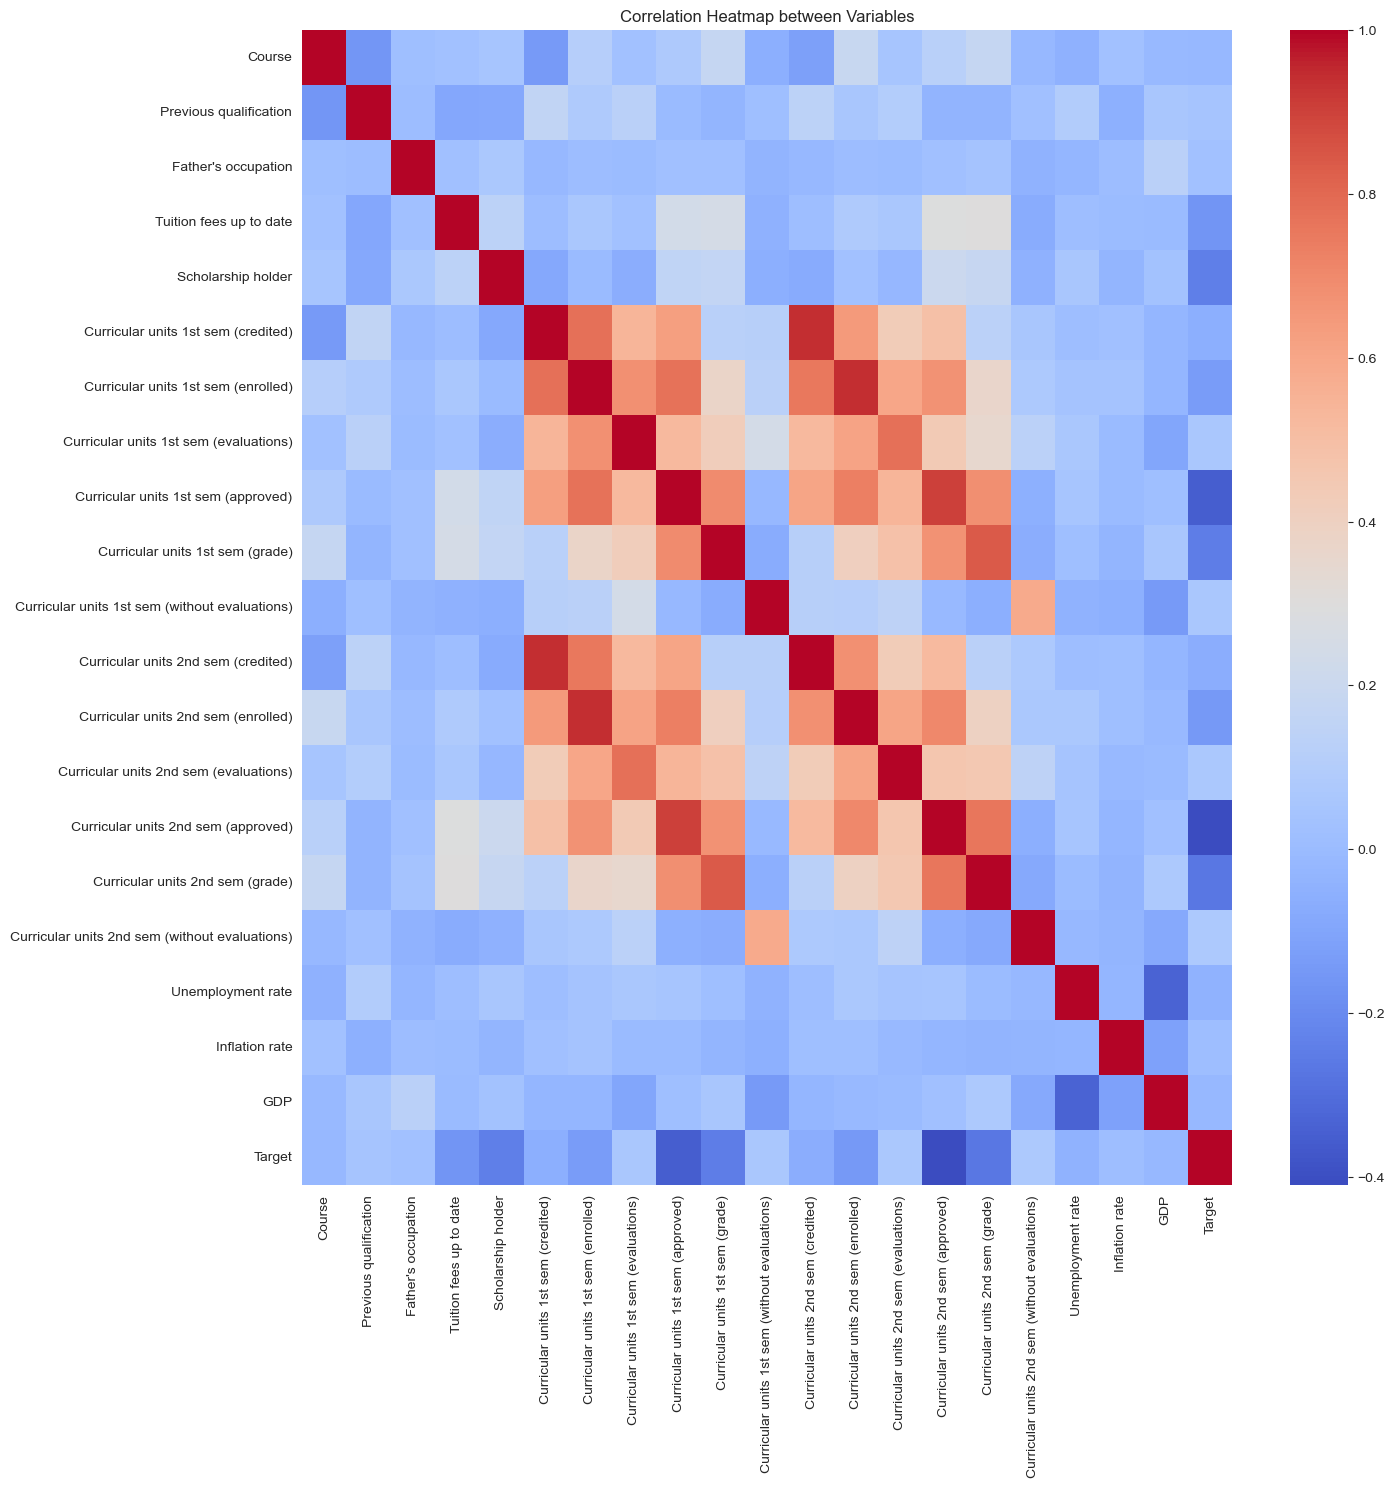

In [166]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap between Variables')
plt.show()

<Axes: >

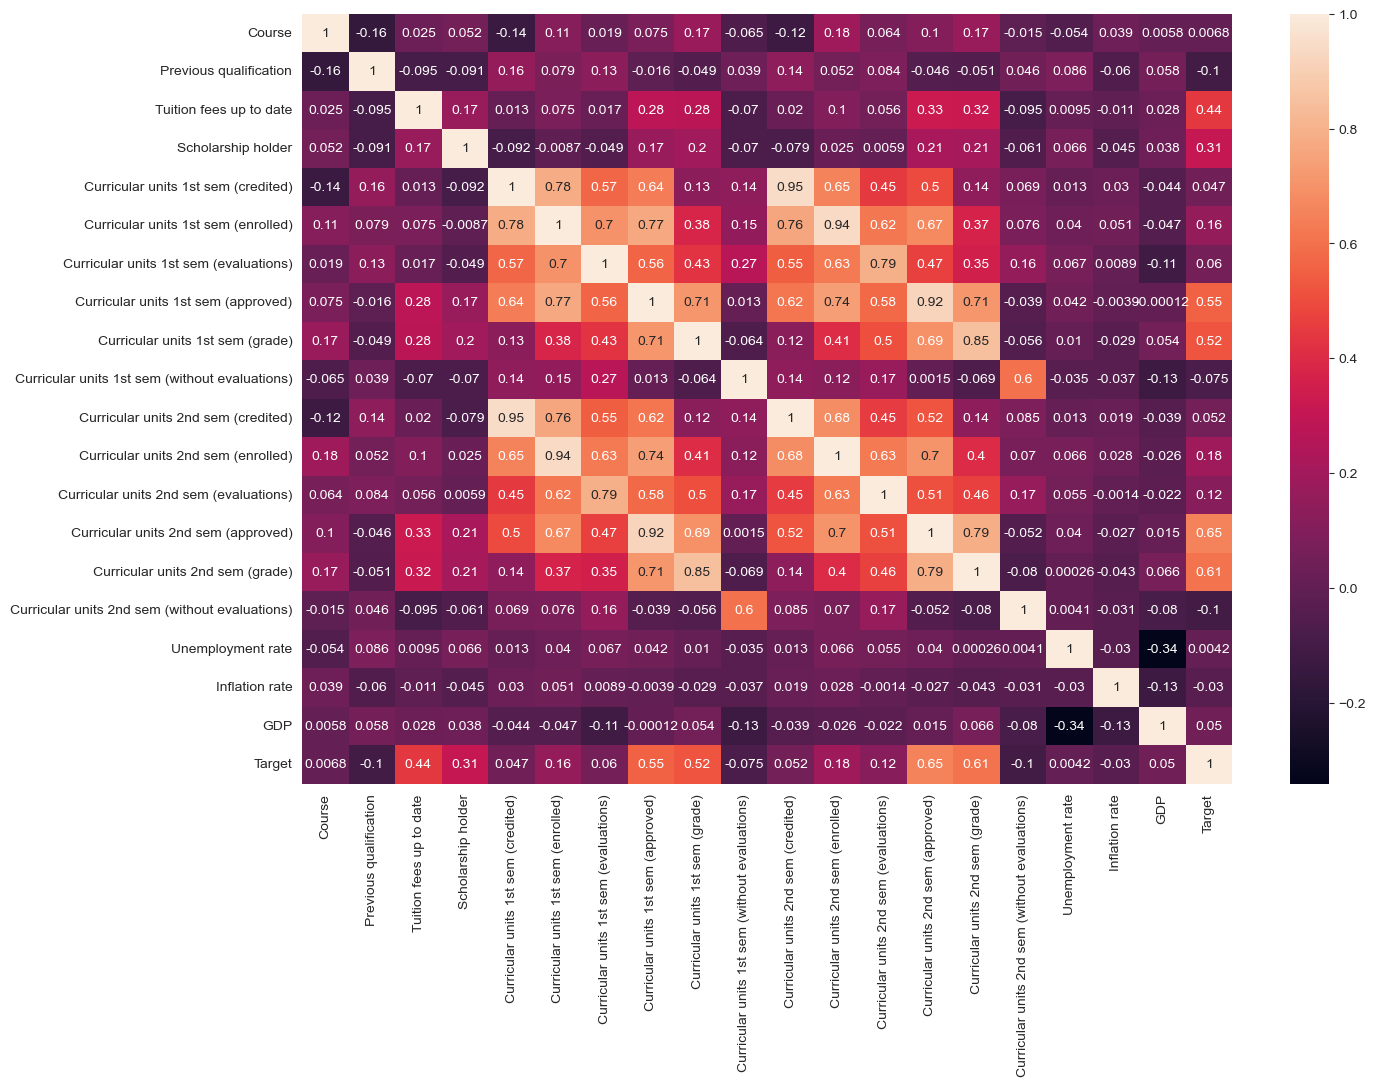

In [257]:

plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), annot=True)

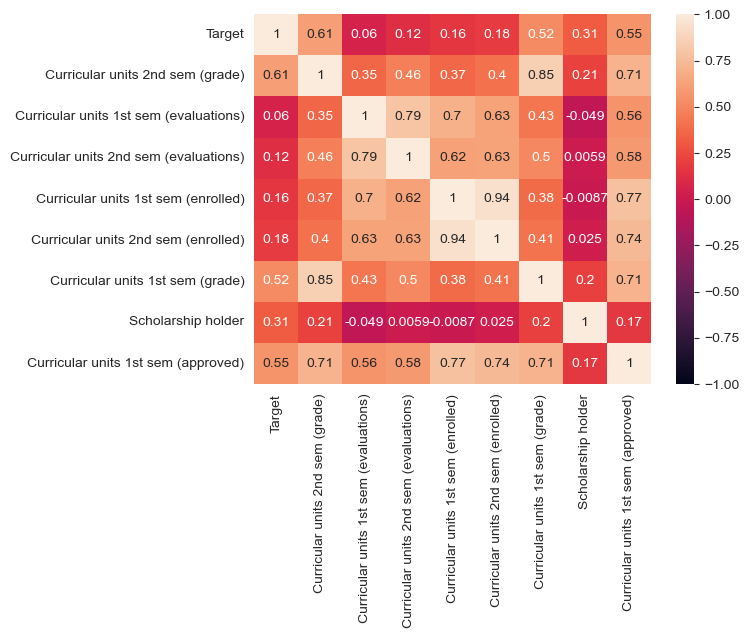

In [258]:
r = df.loc[:,["Target","Curricular units 2nd sem (grade)","Curricular units 1st sem (evaluations)","Curricular units 2nd sem (evaluations)","Curricular units 1st sem (enrolled)","Curricular units 2nd sem (enrolled)","Curricular units 1st sem (grade)","Scholarship holder","Curricular units 1st sem (approved)",]]
     
sns.heatmap(r.corr(),vmin = -1,vmax = 1,annot = True);

<Axes: xlabel='Curricular units 1st sem (grade)'>

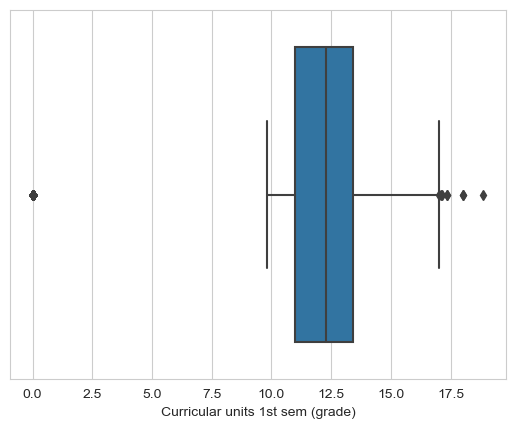

In [167]:
sns.boxplot(x=df['Curricular units 1st sem (grade)'])

<Axes: xlabel='Curricular units 2nd sem (grade)'>

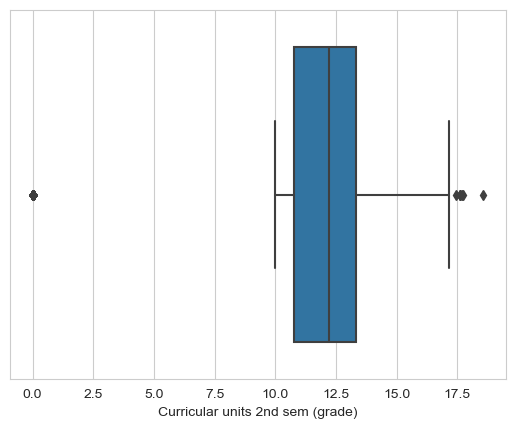

In [169]:
sns.boxplot(x=df['Curricular units 2nd sem (grade)'])

We concentrated on the grades of the each semester because this affects the graduation of the students .


In [318]:
#We neglected the enrolled students
frame = df.loc[:,list(df.columns[list(df.columns.str.contains("grade|approved",regex = True))])]


In [261]:

frame.head()

,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,0,0.000000,0,0.000000
1,6,14.000000,6,13.666667
2,0,0.000000,0,0.000000
3,6,13.428571,5,12.400000
4,5,12.333333,6,13.000000


In [272]:

#Extracting important  columns for machine learning

important_cols = ["Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 1st sem (grade)","Curricular units 1st sem (approved)","Tuition fees up to date" ,"Target"]
#data containing just critical columns
df = df[important_cols]

#data containing only graduates and dropouts we concentrated on  predicting graduates and dropouts.
df = df[df["Target"] != 2]
     

In [271]:
frame = df[important_cols]
Q1 = frame.quantile(0.25)
Q3 = frame.quantile(0.75)
IQR = Q3 - Q1
ml_data = df[~((frame < (Q1 - 1.5 * IQR)) |(frame > (Q3 + 1.5 * IQR))).any(axis=1)]

Removing outlayers of the crucial data.

In [273]:

corr_matrix=df.corr()
corr_matrix

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Target
Curricular units 2nd sem (approved),1.000000,0.786838,0.691907,0.916334,0.329017,0.653995
Curricular units 2nd sem (grade),0.786838,1.000000,0.845864,0.709368,0.318721,0.605350
Curricular units 1st sem (grade),0.691907,0.845864,1.000000,0.710157,0.275555,0.519927
Curricular units 1st sem (approved),0.916334,0.709368,0.710157,1.000000,0.277787,0.554881
Tuition fees up to date,0.329017,0.318721,0.275555,0.277787,1.000000,0.442138
Target,0.653995,0.605350,0.519927,0.554881,0.442138,1.000000


# Project 4

Reagrding the regression models we must seperate the data as y and x variables before this step we first evaluate the data again.

## Splitting Data

In [49]:
# Reloading the data set
df = pd.read_csv("Student_academic.csv")
df = df.drop(df[df['Target']=='Enrolled'].index)
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [51]:
#Again the useless columns are dropped out for better model evaluation.

df = df.drop(["Marital status", "Application mode", "Application order", "Daytime/evening attendance",
              "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation",
              "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Gender",
              "Age at enrollment", "International"], axis=1)
df.head(5)

,Course,Previous qualification,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,2,1,1,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,11,1,0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,5,1,0,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,15,1,1,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,3,1,1,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [53]:
# Separate the data into labels and features
# Separate the y variable, the labels
Y = df['Target']

# Separate the X variable, the features
X = df.drop(columns=['Target'])

In [55]:
encoder = LabelEncoder()

In [57]:
df['Target'] = encoder.fit_transform(df['Target'])
df.head(5)

,Course,Previous qualification,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,2,1,1,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,11,1,0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,5,1,0,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,15,1,1,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,3,1,1,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [59]:
X = df.drop(columns=['Target'], axis=1)
Y = df['Target']

In [61]:
print(X, X.shape)

      Course  Previous qualification  Tuition fees up to date  \
0          2                       1                        1   
1         11                       1                        0   
2          5                       1                        0   
3         15                       1                        1   
4          3                       1                        1   
...      ...                     ...                      ...   
4419      15                       1                        1   
4420      15                       1                        0   
4421      12                       1                        1   
4422       9                       1                        1   
4423      15                       1                        1   

      Scholarship holder  Curricular units 1st sem (credited)  \
0                      0                                    0   
1                      0                                    0   
2                      0

Now we are eliminating the enrolled students which are not be evaluated.

## Model training


In [63]:
from sklearn.model_selection import train_test_split 

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [67]:

X.shape, Y.shape

((3630, 19), (3630,))

In [69]:
standard_scaler = StandardScaler()
X_scaled_train = standard_scaler.fit_transform(X_train)
X_scaled_test = standard_scaler.fit_transform(X_test)

pca = PCA(n_components=3)
X_scaled_train= pca.fit_transform(X_scaled_train)
X_scaled_test = pca.transform(X_scaled_test)

In [71]:
X_train.shape,Y_train.shape

((2904, 19), (2904,))

In [73]:
X_test.shape, Y_test.shape

((726, 19), (726,))

80% of the 3630 rows an 726 is the 20 % of it.

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [77]:
lm.fit(X_train,Y_train)


LinearRegression()

In [81]:
Y_pred=lm.predict(X_test)

In [83]:
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-0.00765433  0.00229119  0.20882785  0.07917694 -0.03503912  0.00578308
 -0.00413174  0.04633724 -0.00300596  0.0236162  -0.03148679 -0.07414407
 -0.01084351  0.12756268 -0.00563561  0.00597957 -0.00201112  0.00351422
  0.00283408]
Intercept: 0.3749918316234002
Mean squared error (MSE): 0.09
Coefficient of determination (R^2): 0.64


In [85]:
r2_score(Y_test, Y_pred)

0.640767502245412

From Linear Regrression we can evaluate the line graph eqaution of Y pred value with is a preicted value of Y (Target values), these coeiffents used to make the equation for y and the intercept value is also given.From the linear regression the R^2 value is the key parameter for our model, which is 0.64. This model is not a super sucessful model,From the Linear reg we know that the  R^2 is getting close to the 1 is a desired goal for measuring the sucess of the model and  the score value is 0.64.

In [87]:

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 0.2945


In [291]:
print ("R2 Score value: {:.4f}".format(r2_score(Y_test, Y_pred)))

R2 Score value: 0.6408


The RMSE value has been found to be 0.2605. It means the standard deviation for our prediction is 2.94, which is not a huge error.
In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value <= 0.7, then the model is not  good enough to deploy. Our R2 score value has been found to be 0.6408. It means that this model explains 64 % of the variance in our dependent variable.Despite we have small RMSE, the R2 score value is not confirms that the model is  good enough to deploy.

Now we can try other models for better results

In [89]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)

svm = SVC()
svm.fit(X_train, Y_train)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [93]:
logreg_predictions = logreg.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
svm_predictions = svm.predict(X_test)
naive_bayes_predictions = naive_bayes.predict(X_test)

In [95]:
logreg_accuracy = accuracy_score(Y_test, logreg_predictions)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predictions)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
naive_bayes_accuracy = accuracy_score(Y_test, naive_bayes_predictions)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)

Logistic Regression Accuracy: 0.9035812672176309
Random Forest Accuracy: 0.8980716253443526
Decision Tree Accuracy: 0.8415977961432507
SVM Accuracy: 0.8856749311294766
Naive Bayes Accuracy: 0.8526170798898072


Regarding the accuracy the best models for our data is Logistic Regression> Random Forest> Support Vector Machine (SVM) > Naive Bayes > Decision Tree.

## Checking for Overfitting and Underfitting

In [97]:
print("Training set score: {:.4f}".format(lm.score(X_train,Y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,Y_test)))

Training set score: 0.6576
Test set score: 0.6408


In [99]:
print("Training set score: {:.4f}".format(logreg.score(X_train,Y_train)))

print("Test set score: {:.4f}".format(logreg.score(X_test,Y_test)))

Training set score: 0.9122
Test set score: 0.9036


In [101]:
print("Training set score: {:.4f}".format(random_forest.score(X_train,Y_train)))

print("Test set score: {:.4f}".format(random_forest.score(X_test,Y_test)))

Training set score: 0.9910
Test set score: 0.8981


In [103]:
print("Training set score: {:.4f}".format(decision_tree.score(X_train,Y_train)))

print("Test set score: {:.4f}".format(decision_tree.score(X_test,Y_test)))

Training set score: 0.9910
Test set score: 0.8416


In [105]:
print("Training set score: {:.4f}".format(svm.score(X_train,Y_train)))

print("Test set score: {:.4f}".format(svm.score(X_test,Y_test)))

Training set score: 0.9012
Test set score: 0.8857


In [107]:
print("Training set score: {:.4f}".format(naive_bayes.score(X_train,Y_train)))

print("Test set score: {:.4f}".format(naive_bayes.score(X_test,Y_test)))

Training set score: 0.8502
Test set score: 0.8526


The training/test set scores are important for evaluating performance of the models.
Test score and training score are desired to be closer values. 
If the scores are close values that means the model performs well on the training data.In other words, models learn the relationships appropriately from the training data.

Regrading to our models "Random Forest" and "Decision Tree" have the highest scores among all.However, we can see higher difference between the training and test scores.They would be not the perfect fit.

Okay now we can do predictions based on these 5 models:

## Prediction with Models

In [119]:
#Re-uplading the csv file with Target values as numeric and relevant data in frame.
df.head(5)

,Course,Previous qualification,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,2,1,1,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,11,1,0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,5,1,0,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,15,1,1,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,3,1,1,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [121]:
#Okay from our data frame we take the first row valeus for prediction of the Target value as "Dropout",which is Target:0 
#lets see.

input_data = (2, 1, 1, 0, 0, 0, 0, 0, 0.000000, 0, 0, 0, 0, 0, 0.000000, 0, 10.8, 1.4, 1.74)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction_logreg = logreg.predict(input_data_reshaped)
prediction_rf = random_forest.predict(input_data_reshaped)
prediction_dt = decision_tree.predict(input_data_reshaped)
prediction_svm = svm.predict(input_data_reshaped)
prediction_nb = naive_bayes.predict(input_data_reshaped)

print("Logistic Regression Prediction:", prediction_logreg[0])
print("Random Forest Prediction:", prediction_rf[0])
print("Decision Tree Prediction:", prediction_dt[0])
print("SVM Prediction:", prediction_svm[0])
print("Naive Bayes Prediction:", prediction_nb[0])


Logistic Regression Prediction: 1
Random Forest Prediction: 0
Decision Tree Prediction: 0
SVM Prediction: 0
Naive Bayes Prediction: 0


C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Now we have the outputs of the Target of the first row so basically at first  row we have the Target value of 0  meaning that  stduent is "Dropout" the degree remembering that we have only 0s and 1s as Dropout:0, Gardaute:1.Unlike the accuracy Logistic Regression failed to predict the dropout target value among all the models.

In [124]:
#Now we can predict with the all models  for Graduate students as Target:1
#Taking the second row as a example(Using numpy array reshape function data frame to array)

input_data = (11,1,0,0,0,6,6,6,14.000000,0,0,6,6,6, 13.666667, 0, 13.9, -0.3, 0.79)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction_logreg = logreg.predict(input_data_reshaped)
prediction_rf = random_forest.predict(input_data_reshaped)
prediction_dt = decision_tree.predict(input_data_reshaped)
prediction_svm = svm.predict(input_data_reshaped)
prediction_nb = naive_bayes.predict(input_data_reshaped)

print("Logistic Regression Prediction:", prediction_logreg[0])
print("Random Forest Prediction:", prediction_rf[0])
print("Decision Tree Prediction:", prediction_dt[0])
print("LinearSVC:", prediction_svm[0])
print("Naive Bayes Prediction:", prediction_nb[0])

Logistic Regression Prediction: 1
Random Forest Prediction: 1
Decision Tree Prediction: 1
LinearSVC: 1
Naive Bayes Prediction: 0


C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Now we can see that only Naive Bayes predicted wrongly the graduate students as a model.
We have two models having issues with predictions before it was Logistic regrression now is Naive Bayes.
We make the model more complex with Logistic regression since we have binary data as 0s and 1s.Moreover, our model is also a catergorical model we can work with also categorical models.


## Checking Performance Metrics

In [127]:
from xgboost import XGBClassifier

models = {"Logistic Regression":LogisticRegression(),
           "SVC":LinearSVC(),
          "XGBoost":XGBClassifier(),
          "Random Forest": RandomForestClassifier(), 
          "Decision Tree": DecisionTreeClassifier(),
          "Naives Bayes": GaussianNB()}


log = LogisticRegression()
log.fit(X_train,Y_train)

rndf =  RandomForestClassifier()
rndf.fit(X_train,Y_train)

lsvc = LinearSVC()
lsvc.fit(X_train,Y_train)

xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

gnb = GaussianNB()
gnb.fit(X_train,Y_train)


C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GaussianNB()

In [153]:
arr = []

for name,model in models.items():
  current_model = model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print(name)
  print("Accuracy:", "%.3f" % metrics.accuracy_score(Y_test, Y_pred))
  print("Precision:", "%.3f" % metrics.precision_score(Y_test, Y_pred))
  print("Recall:", "%.3f" % metrics.recall_score(Y_test, Y_pred))
  print("F1 Score:", "%.3f" % metrics.f1_score(Y_test, Y_pred))
  arr.append([name,"%.3f" % metrics.accuracy_score(Y_test, Y_pred),
              "%.3f" % metrics.precision_score(Y_test, Y_pred),
              "%.3f" % metrics.recall_score(Y_test, Y_pred),
              "%.3f" % metrics.f1_score(Y_test, Y_pred)])
  print("\n")

C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.904
Precision: 0.891
Recall: 0.953
F1 Score: 0.921




C:\Users\MELDA\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC
Accuracy: 0.905
Precision: 0.882
Recall: 0.970
F1 Score: 0.924


XGBoost
Accuracy: 0.897
Precision: 0.894
Recall: 0.937
F1 Score: 0.915


Random Forest
Accuracy: 0.895
Precision: 0.881
Recall: 0.951
F1 Score: 0.915


Decision Tree
Accuracy: 0.840
Precision: 0.862
Recall: 0.870
F1 Score: 0.866


Naives Bayes
Accuracy: 0.853
Precision: 0.836
Recall: 0.935
F1 Score: 0.883




In [131]:
pd.DataFrame({"Model":list(models.keys()),"Accuracy":[i[1] for i in arr],"Precision":[i[2] for i in arr],"Recall":[i[3] for i in arr],"F1 score":[i[4] for i in arr]})
     

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.904,0.891,0.953,0.921
1,SVC,0.902,0.886,0.958,0.921
2,XGBoost,0.897,0.894,0.937,0.915
3,Random Forest,0.888,0.882,0.937,0.909
4,Decision Tree,0.851,0.869,0.881,0.875
5,Naives Bayes,0.853,0.836,0.935,0.883


"Precision","Recall" and "F1 Score" is the total overall accuracy measure of the classification model. We should take into account that F1 score, but you must also consider recall.Since we have binary classsifcation it is enough just to consider accuracy and F1.We must take into account in some risky (e.g.health and justice system data) cases we cannot avoid Recall for avoiding true negative results (TYPE II ERRORS).
Also we can use ROC-AUC graphs since we have binary classification.Also we can check the confusion matrix.Confusion matrix is known as how many times the model predict the class.

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score


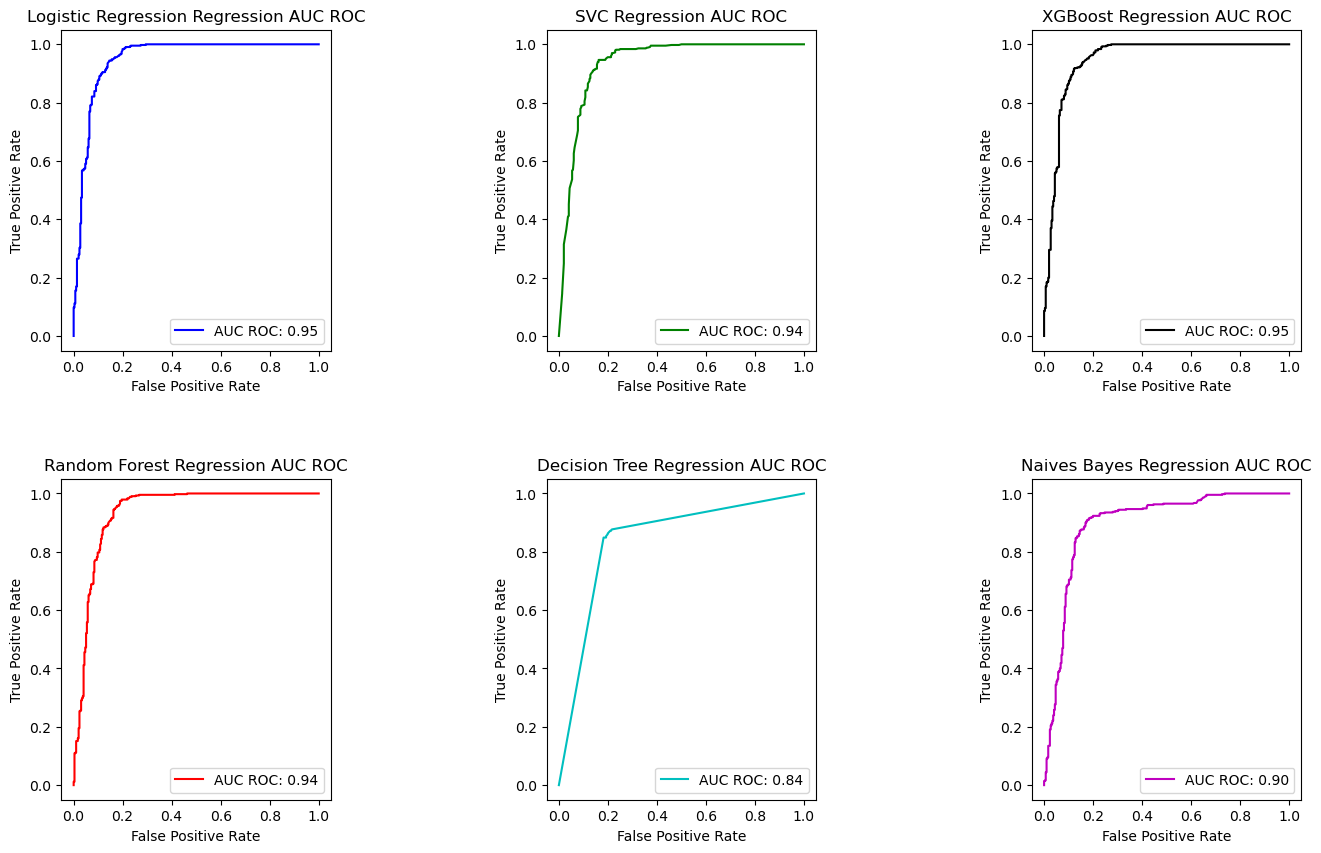

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
algos = [log,rndf,lsvc,xgb,dtree,gnb]
cnt = 0
colour = ["b","g","k","r","c","m"]

for i in range(0,2):
  for j in range(0,3):
    Y_pred_proba = algos[cnt].predict_proba(X_test)[:,-1] if cnt != 2 else algos[cnt].decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
    auc = roc_auc_score(Y_test, Y_pred_proba)
    axes[i,j].plot(fpr, tpr, label = "AUC ROC: {:.2f}".format(auc),color = colour[cnt])
    axes[i,j].set_xlabel('False Positive Rate')
    axes[i,j].set_ylabel('True Positive Rate')
    axes[i,j].legend(loc = "lower right")
    axes[i,j].set_title("{} Regression AUC ROC".format(list(models.keys())[cnt]))
    cnt+=1
plt.subplots_adjust(hspace=0.4, wspace=0.8)


From the ROC Curves area under the curves AUC and they are similiarly good.Obviously, Logistic Regression and XGBoost took the the lead with 0.95 and Support Vector Machines and Random Forest have the AUC of 0.94 which is also good result.

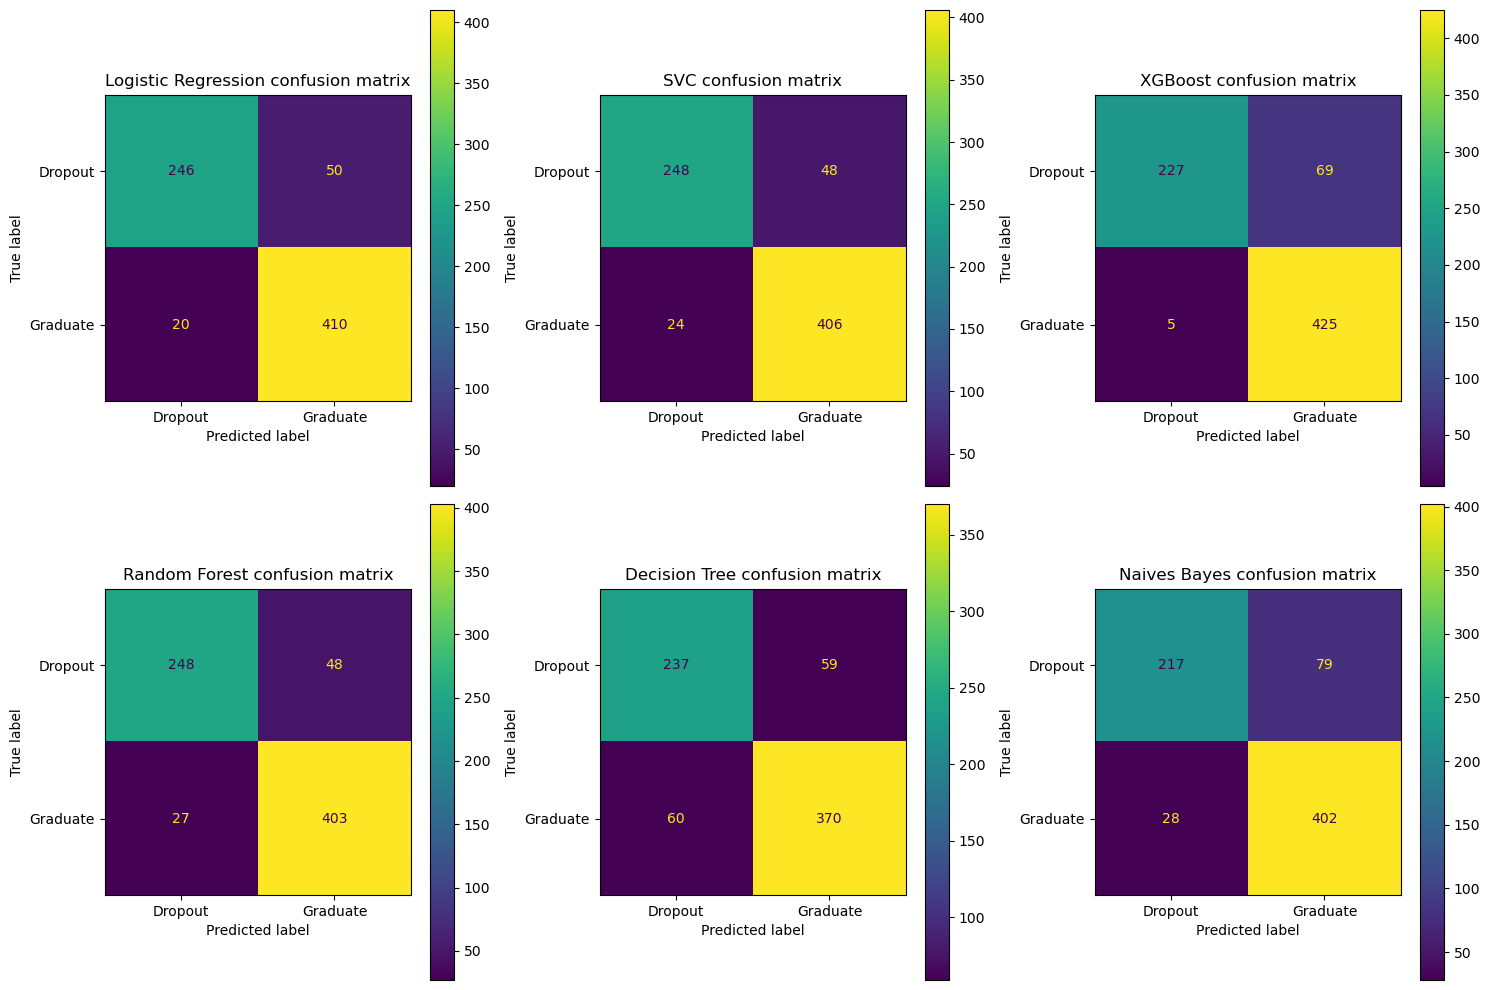

In [143]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
cnt = 0
for i in range(0,2):
  for j in range(0,3):
    model_pred = algos[cnt].predict(X_test)
    conf_m = confusion_matrix(Y_test, model_pred)
    display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=['Dropout', 'Graduate'],)
    display.plot(values_format='',ax = axes[i,j])
    display.ax_.set_title("{} confusion matrix".format(list(models.keys())[cnt]))
    cnt+=1
  plt.tight_layout()


Logistic Regression has the best classifier model because it has "True Positive" prediction.

## Model Evaluation

In [145]:
Training_score = [round(i.score(X_train, Y_train) * 100, 2) for i in algos]
Testing_score = [round(i.score(X_test, Y_test) * 100, 2) for i in algos]
     

In [147]:
results_training = pd.DataFrame({"ML_Model":list(models.keys()),"Training score":Training_score})
results_testing = pd.DataFrame({"ML_Model":list(models.keys()),"Testing score":Testing_score})

In [149]:

print(results_training)
print(results_testing)

              ML_Model  Training score
0  Logistic Regression           91.22
1                  SVC           99.10
2              XGBoost           90.63
3        Random Forest           98.86
4        Decision Tree           99.10
5         Naives Bayes           85.02
              ML_Model  Testing score
0  Logistic Regression          90.36
1                  SVC          90.08
2              XGBoost          89.81
3        Random Forest          89.67
4        Decision Tree          83.61
5         Naives Bayes          85.26


Training scores is higher than tesing scores which is a sign of over-fitting.It is due to the nature of the models.

Decision trees and random forest,and XGBoost, are categorical models that posses high flexiblity meaning that has high variance, we can tune in hyperparameters.

"Logistic Regression" performs best among all moedels for the university to predict the enrolled student will graduate or dropout.
